<a href="https://colab.research.google.com/github/luckycharmz1/CIS-050/blob/main/AI_Week6_Assignment_Charmaine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


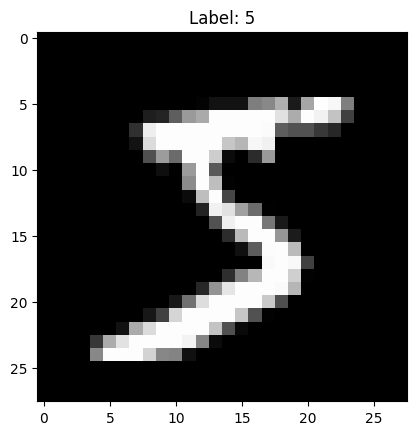

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images (convert values from [0, 255] to [0, 1])
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the images to add the channel dimension (since MNIST is grayscale, the channel is 1)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Show a sample image to check the data
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Another convolutional layer
    MaxPooling2D((2, 2)),  # Pooling layer
    Flatten(),  # Flatten the output for the fully connected layer
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(10, activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.8903 - loss: 0.3479 - val_accuracy: 0.9847 - val_loss: 0.0457
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9837 - loss: 0.0520 - val_accuracy: 0.9887 - val_loss: 0.0372
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9887 - loss: 0.0368 - val_accuracy: 0.9876 - val_loss: 0.0374
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9913 - loss: 0.0273 - val_accuracy: 0.9912 - val_loss: 0.0249
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9936 - loss: 0.0198 - val_accuracy: 0.9875 - val_loss: 0.0382
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9942 - loss: 0.0169 - val_accuracy: 0.9916 - val_loss: 0.0291
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9957 - loss: 0.0131 - val_accuracy: 0.9906 - val_loss: 0.0309
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9963 -

In [ ]:
# Evaluate the model's performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

In [ ]:
# Plot the accuracy and loss graphs
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Make predictions on the test dataset
predictions = model.predict(x_test[:10])

# Display the first 10 predictions alongside the actual labels
for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {y_test[i]} - Predicted: {predictions[i].argmax()}")
    plt.show()